In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Read the dataset

df = pd.read_csv('local_sms.csv')
df.head()

,label,sms
0,spam,Happy Wednesday! Hali na at \nmagsaya kasama a...
1,spam,"Hi JERARD B., Experience the \nhighest-winnin..."
2,spam,Stress kana ba agad dahil sa \nulan? Ako bahal...
3,spam,"JERARD B.! Experience, JOIN \nAND WIN! W+ Givi..."
4,ham,DTI n pp AK s josh 10 \npamdesal po San po kay...


In [2]:
# Check ham and spam count in the dataset

df.label.value_counts()

ham     200
spam    100
Name: label, dtype: int64

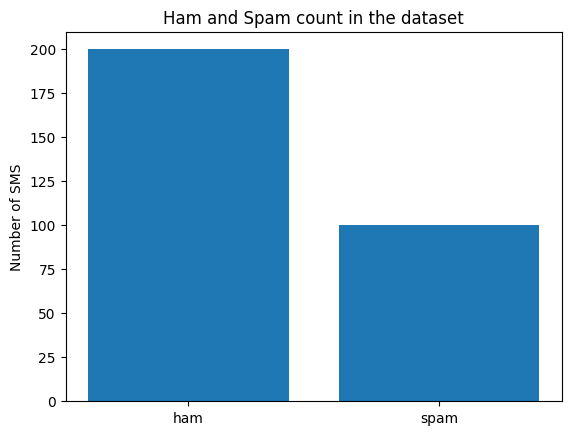

In [3]:
# Plot number of Ham and Spam in the dataset

ham_count = df.label.value_counts().ham
spam_count = df.label.value_counts().spam

x = ["ham", "spam"]
h = [ham_count, spam_count]

plt.bar(x, h)
plt.ylabel("Number of SMS")
plt.title("Ham and Spam count in the dataset")
plt.show()

In [4]:
# Set spam sms as 0 and ham sms as 1

df.loc[df['label'] == 'spam', 'label',] = 0
df.loc[df['label'] == 'ham', 'label',] = 1

In [5]:
# Set 'sms' column as X and 'label' column as Y

X = df['sms']
Y = df['label']

print(X)

0      Happy Wednesday! Hali na at \nmagsaya kasama a...
1      Hi JERARD B.,  Experience the \nhighest-winnin...
2      Stress kana ba agad dahil sa \nulan? Ako bahal...
3      JERARD B.! Experience, JOIN \nAND WIN! W+ Givi...
4      DTI n pp AK s josh 10 \npamdesal po San po kay...
                             ...                        
295    Hindi ko naman kailangan ng mahal na cellphone...
296    JARED B., No patch-up, stable server & easy E-...
297    Hello JARED B., Play the Popular Online Casino...
298    CYRILLE JAYE H.! Get your WELCOME BONUS up to ...
299    CYRILLE JAYE H. Earn easy money tonight! here ...
Name: sms, Length: 300, dtype: object


In [6]:
print(Y)

0      0
1      0
2      0
3      0
4      1
      ..
295    1
296    0
297    0
298    0
299    0
Name: label, Length: 300, dtype: object


In [7]:
# Split dataset to training set (80%) and testing set (20%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
# Convert the SMS to a numerical representation using TF-IDF

vectorizer = TfidfVectorizer()

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

# Convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [9]:
print(X_train)

259    Para sa akin kong mahal mo ang isang tao\nWala...
278    Ang Love ay inumpisahan ni Adan at Eba,\nSinun...
74     Special Daily Bonus 1290PHP for all! Come to r...
134    Good day! We accept sangla Or/Cr (w/o taking y...
207    Yung feeling na may naalala kang nakakakilig n...
                             ...                        
194    Pag nagtampo ang isang tao, Hindi galit yan na...
167    Sa tingin ko mawawala ang\npangit sa mundo kap...
258    Hindi naman talaga distansya ang nakakasira sa...
175    virus ka ba? kung virus k man d kita\nhahayaan...
220    Hindi ka biniyayaan ng MAGANDANG MUKHA,\nPara ...
Name: sms, Length: 240, dtype: object


In [10]:
print(X_train_features)

  (0, 694)	0.24763011783308525
  (0, 1246)	0.24763011783308525
  (0, 1106)	0.2002421116628513
  (0, 689)	0.178816339910928
  (0, 216)	0.24763011783308525
  (0, 681)	0.09748906167651453
  (0, 150)	0.20845282093446954
  (0, 1626)	0.24763011783308525
  (0, 1182)	0.27592421269527473
  (0, 1117)	0.23029388778097934
  (0, 569)	0.10915587285183241
  (0, 1013)	0.17666572745036915
  (0, 278)	0.24763011783308525
  (0, 430)	0.24763011783308525
  (0, 1650)	0.19406647798272064
  (0, 1532)	0.16759858737117891
  (0, 641)	0.3174413495249212
  (0, 148)	0.08937575455403679
  (0, 992)	0.10080517289340508
  (0, 887)	0.15368469568179025
  (0, 744)	0.2006574067574378
  (0, 123)	0.18332117670533182
  (0, 1380)	0.18764396155665547
  (0, 1235)	0.13184362883528047
  (1, 353)	0.15403754847328968
  :	:
  (238, 1292)	0.25116180832742835
  (238, 1066)	0.25116180832742835
  (238, 958)	0.25116180832742835
  (238, 533)	0.25116180832742835
  (238, 1637)	0.5023236166548567
  (238, 191)	0.1583552833313206
  (238, 946)	0.

In [11]:
# Train the model using Naive Bayes algorithm

model = MultinomialNB()
model.fit(X_train_features, Y_train)

MultinomialNB()

In [12]:
# Make predictions on the training set

prediction_train_set = model.predict(X_train_features)

# Evaluation of model's performance on the training set

accuracy_train = accuracy_score(Y_train, prediction_train_set)
precision_train = precision_score(Y_train, prediction_train_set)
recall_train = recall_score(Y_train, prediction_train_set)
f1_train = f1_score(Y_train, prediction_train_set)

print("Accuracy Score: {}%".format(round(accuracy_train*100, 2)))
print("Precision Score: {}%".format(round(precision_train*100, 2)))
print("Recall Score: {}%".format(round(recall_train*100, 2)))
print("F1 Score: {}%".format(round(f1_train*100, 2)))

Accuracy Score: 95.0%
Precision Score: 95.65%
Recall Score: 96.86%
F1 Score: 96.25%


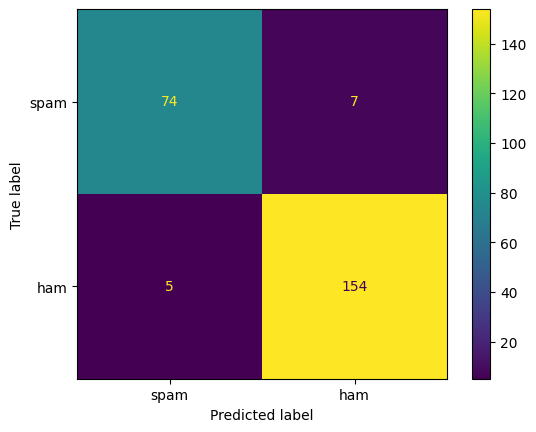

In [19]:
# Plot Confusion Matrix of the predictions on the train set

cm = confusion_matrix(Y_train, prediction_train_set, labels = model.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['spam', 'ham'])
cm_disp.plot()

In [13]:
# Make predictions on the testing set

prediction_test_set = model.predict(X_test_features)

# Evaluation of model's performance on the testing set

accuracy_test = accuracy_score(Y_test, prediction_test_set)
precision_test = precision_score(Y_test, prediction_test_set)
recall_test = recall_score(Y_test, prediction_test_set)
f1_test = f1_score(Y_test, prediction_test_set)

print("Accuracy Score: {}%".format(round(accuracy_test*100, 2)))
print("Precision Score: {}%".format(round(precision_test*100, 2)))
print("Recall Score: {}%".format(round(recall_test*100, 2)))
print("F1 Score: {}%".format(round(f1_test*100, 2)))

Accuracy Score: 95.0%
Precision Score: 95.24%
Recall Score: 97.56%
F1 Score: 96.39%


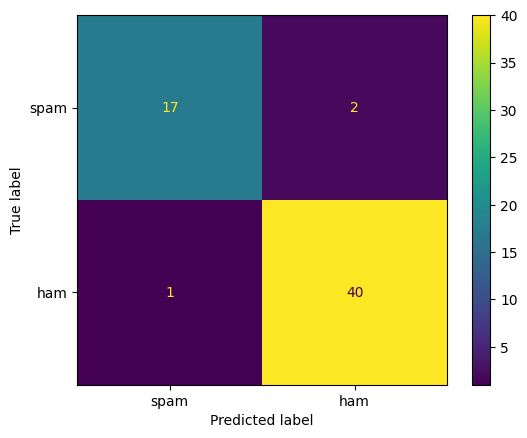

In [17]:
# Plot Confusion Matrix of the predictions on the test set

cm = confusion_matrix(Y_test, prediction_test_set, labels = model.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['spam', 'ham'])
cm_disp.plot()

In [155]:
# Building a predictive system

sample_sms = ["Sumali na sa pinakamadali at pinakamabilis na paraan magkapera. Sali na dali!  http://fdsv03.contact"]

# Convert the sample SMS to a numerical representation using TF-IDF

sample_sms_features = vectorizer.transform(sample_sms)

# Make prediction on the sample SMS (Ham = 1 & Spam = 0)

prediction_sample_sms = model.predict(sample_sms_features)

if prediction_sample_sms == 0:
    print("The SMS is a Spam")
else:
    print("The SMS is a Ham")

The SMS is a Spam


In [156]:
# Create a pickel file of the model and TF-IDF Vectorizer

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))